In [4]:
import numpy as np
import os
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import scipy
from scipy import io
from scipy.io import loadmat
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [5]:
categories = ["0", "1", "2", "3", "4", "5", "6","7", "8", "9"]
values = array(categories) #same as above array[]
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(values) #[0,1,2,3,4,5,6,7,8,9]
onehot_encoder = OneHotEncoder(sparse=True)
int_encoded = int_encoded.reshape(-1,1) #(10,1) matrix 
onehot_encoded = onehot_encoder.fit_transform(int_encoded) 
#print(onehot_encoded)

In [6]:
#Load dataset and segregate labels from images
image_training= io.loadmat('train_32x32.mat')
image_testing= io.loadmat('test_32x32.mat')
train_image= image_training['X']
train_tag= image_training['y']
test_image= image_testing['X']
test_tag= image_testing['y']

In [4]:
print("Training", train_image.shape, train_tag.shape)

Training (32, 32, 3, 73257) (73257, 1)


In [ ]:
#univariate Statistical data
print("Train Mean", np.mean(train_image))
print("Test Mean", np.mean(test_image))
print("Train std-Deviation", np.std(train_image))
print("Test std-Deviation", np.std(test_image))

Train Mean 115.11177966923525
Test Mean 116.78117117073857


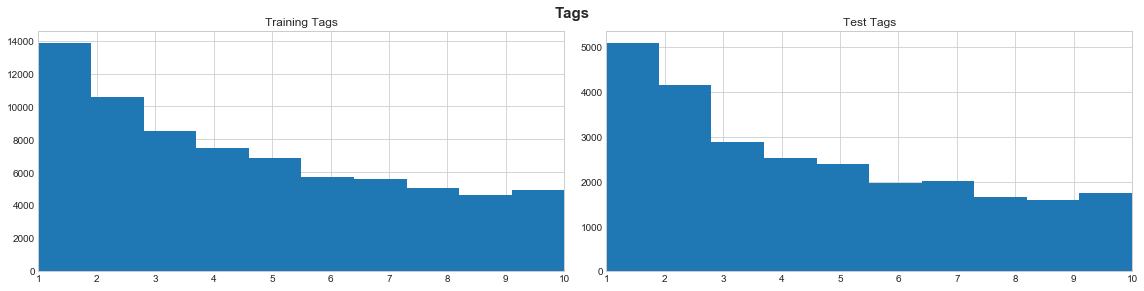

In [12]:
#Plot distribution of tags in training and test

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
fig.suptitle('Tags', fontsize=15, fontweight='bold', y=1)

ax1.hist(train_tag, bins=10)
ax1.set_title("Training Tags")
ax1.set_xlim(1, 10)

ax2.hist(test_tag, bins=10);
ax2.set_title("Test Tags");

fig.tight_layout()


In [106]:
#required format
train_image = np.transpose(train_image, (3, 0, 1, 2))
test_image = np.transpose(test_image, (3, 0, 1, 2))
train_tag = train_tag[:,0]
test_tag= test_tag[:,0]
print("Training", train_image.shape, train_tag.shape)

Training (73257, 32, 32, 3) (73257,)


In [107]:
#check the tags available
print(np.unique(train_tag))

[ 1  2  3  4  5  6  7  8  9 10]


In [108]:
#change tag 10 to 0
train_tag[train_tag == 10] = 0
test_tag[test_tag == 10] = 0
print(np.unique(train_tag))

[0 1 2 3 4 5 6 7 8 9]


In [109]:
#Function for plotting
def plot_images(image, nrows, ncols, tags):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if image[i].shape == (32, 32, 3):
            ax.imshow(image[i])
        else:
            ax.imshow(image[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(tags[i])

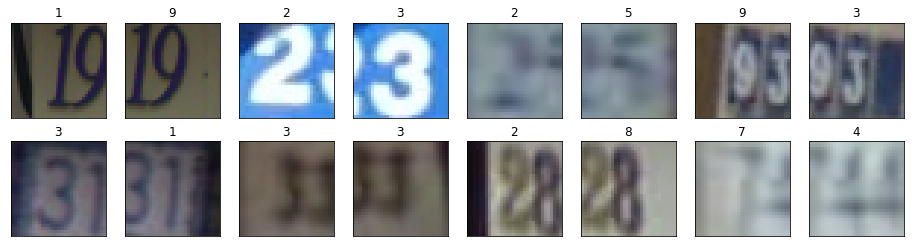

In [110]:
plot_images(train_image, 2, 8, train_tag)

In [72]:
#Images are different in Digit font, color, clarity(blur/clear) etc

In [111]:
print(train_image.shape, train_tag.shape)
print(test_image.shape, test_tag.shape)

(73257, 32, 32, 3) (73257,)
(26032, 32, 32, 3) (26032,)


In [112]:
#We need to split data into test and crossvalidation set

from sklearn.model_selection import train_test_split

test_image,crossvalidation_image,test_tag,crossvalidation_tag= train_test_split(test_image,test_tag,test_size=13016,random_state=106)


In [113]:
print ('Train data:', train_image.shape,', Train Tag:', train_tag.shape)
print ('Test data:', test_image.shape,', Test Tag:', test_tag.shape)
print ('Crossvalidation data:', crossvalidation_image.shape,', Crossvalidation tag:', crossvalidation_tag.shape)

Train data: (73257, 32, 32, 3) , Train Tag: (73257,)
Test data: (13016, 32, 32, 3) , Test Tag: (13016,)
Crossvalidation data: (13016, 32, 32, 3) , Crossvalidation tag: (13016,)


In [114]:
#Training data: 73257
#Test Data: 13016
#CrossValidation/Validation data: 13016

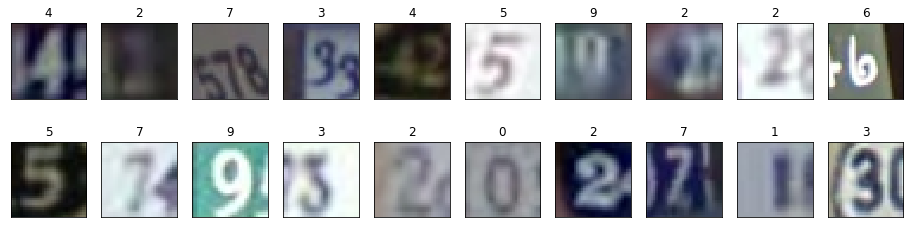

In [115]:
plot_images(test_image, 2, 10, test_tag)

(32, 32, 3)


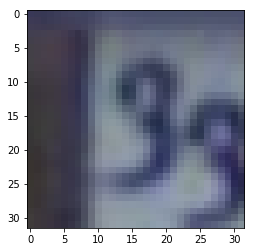

In [118]:
print(train_image[0].shape)
plt.imshow(test_image[3])

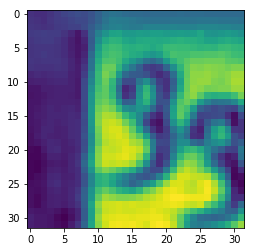

In [119]:
img = test_image[3]
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

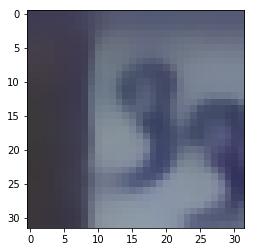

In [120]:
img = test_image[3]
blur = cv2.bilateralFilter(img,9,75,75)
plt.imshow(blur)

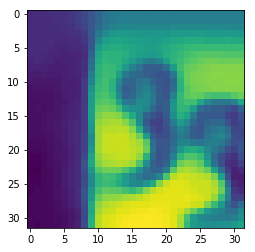

In [121]:
#grayscale with blur
gray_image = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

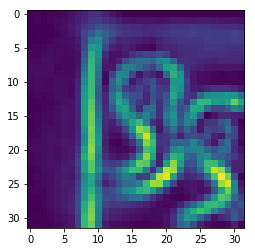

In [122]:
#Sobel

scale = 1
delta = 0
ddepth = cv2.CV_16S
img = test_image[3]
img = cv2.GaussianBlur(img,(3,3),0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

gradient_x = cv2.Sobel(gray,ddepth,1,0,ksize = 3, scale = scale, delta= delta, borderType = cv2.BORDER_DEFAULT)
gradient_y = cv2.Sobel(gray,ddepth,0,1,ksize = 3, scale = scale, delta= delta, borderType = cv2.BORDER_DEFAULT)

abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)

dst = cv2.addWeighted(abs_gradient_x,0.5,abs_gradient_y,0.5,0)

plt.imshow(dst)

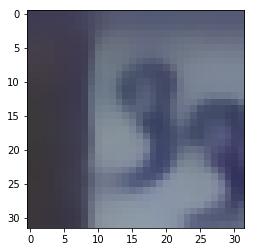

In [123]:
img = test_image[3]
bilfilter = cv2.bilateralFilter(img,9,75,75)
plt.imshow(bilfilter)

In [124]:
#this method is overused, everyone has done grayscaling only so we should consider other methods

def rgb2gray(images):
    greyconvert = np.dot(images, [0.299, 0.587, 0.114]) #reference: https://angeljohnsy.blogspot.com/2011/04/rgb-image-to-grayscale-image.html

    return np.expand_dims(greyconvert, axis=3)

# Transform the images to greyscale
train_greyscale = rgb2gray(train_image).astype(np.float32)
test_greyscale = rgb2gray(test_image).astype(np.float32)
crossvalidation_greyscale = rgb2gray(crossvalidation_image).astype(np.float32)

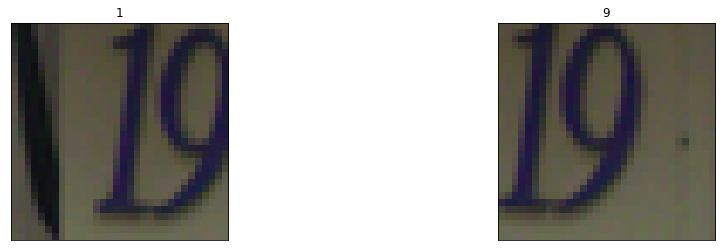

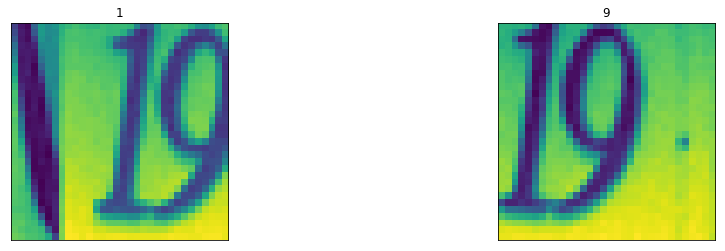

In [125]:
plot_images(train_image, 1, 2, train_tag)
plot_images(train_greyscale, 1, 2, train_tag)

In [126]:
print("Training Color", train_image.shape)
print("Training Gray", train_greyscale.shape)

Training Color (73257, 32, 32, 3)
Training Gray (73257, 32, 32, 1)


In [127]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(train_tag.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
train_tag = enc.transform(train_tag.reshape(-1, 1)).toarray()
test_tag = enc.transform(test_tag.reshape(-1, 1)).toarray()
crossvalidation_tag = enc.transform(crossvalidation_tag.reshape(-1, 1)).toarray()

print("Training set", train_tag.shape)
print("Test set", test_tag.shape)
print("Training set", crossvalidation_tag.shape)

Training set (73257, 10)
Test set (13016, 10)
Training set (13016, 10)


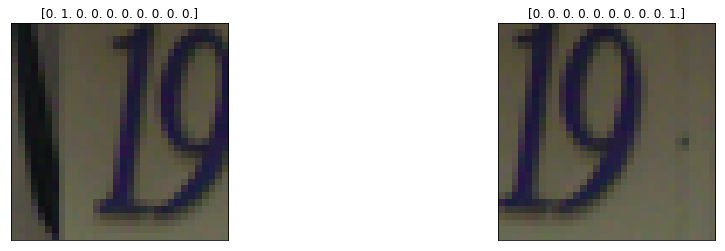

In [129]:
plot_images(train_image, 1, 2, train_tag)